# **<center> Chủ đề: thuật toán K-means </center>**

**Nhóm 2:**
1. Quách Xuân Nam
2. Trương Văn Thông
3. Nguyễn Đình Thanh

**Giới thiệu:** 

Nhóm thực hiện cào dữ liệu gồm các thông tin:
1. ten_truyen: Tên truyện.
2. duong_dan: Đường dẫn.
3. luot_xem: Số lượt xem.
4. xep_hang: Xếp hạng.
5. danh_gia: Số lượt đánh giá.
6. theo_doi: Số lượt theo dõi.
7. binh_luan: Số lượt bình luận.
8. tap_moi: Tập truyện mới nhất.

Sau đó thực hiện chuẩn hóa và trực quan hóa dữ liệu.\
Cuối cùng là xây dựng mô hình k-mean để gom cụm những đối tượng có những thuộc tính tương tự nhau.

# 1. Cào dữ liệu

import các thư viện cần thiết để cào

In [2]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from time import sleep
import numpy as np
import pandas as pd

In [2]:
def rand(x = 1, y = 3):
    return np.random.uniform(x, y)

In [3]:
ten_truyen = []
duong_dan = []
luot_xem = []
xep_hang = []
danh_gia = []
theo_doi = []
binh_luan = []
tap_moi = []

head_url = 'https://www.nettruyenin.com/'
driver = uc.Chrome(headless=True)
driver.maximize_window()
page = 60
dem = 1
while page != 0:
    driver.get(head_url + f"?page={page}")
    sleep(rand())
    truyen = driver.find_elements(By.XPATH,'//a[@class="jtip"]')
    link = [i.get_attribute('href') for i in truyen] # lấy list link truyện
    for i in link: # truy cập từng link để lấy thông tin từ truyện
        if i not in duong_dan:
            duong_dan.append(i)
            driver.get(i)
            sleep(rand())
            print(f'{dem} ', end='')
            e0 = driver.find_element(By.XPATH, '//h1')
            ten_truyen.append(e0.text)
            print(f' = ', end='')
            e1 = driver.find_elements(By.XPATH, '//p[@class="col-xs-8"]')
            luot_xem.append(e1[-1].text)
            print(f' = ', end='')
            e2 = driver.find_element(By.XPATH, '//span[@itemprop="ratingValue"]')
            xep_hang.append(e2.text)
            print(f' = ', end='')
            e3 = driver.find_element(By.XPATH, '//span[@itemprop="ratingCount"]')
            danh_gia.append(e3.text)
            print(f' = ', end='')
            e4 = driver.find_element(By.XPATH, '//div[@class="follow"]//span//b')
            theo_doi.append(e4.text)
            print(f' = ', end='')
            e5 = driver.find_element(By.XPATH, '//span[@class="comment-count"]')
            binh_luan.append(e5.text)
            print(f' = ', end='')
            e6 = driver.find_element(By.XPATH, '//div[@class="col-xs-5 chapter"]//a')
            tap_moi.append(e6.text)
            print(f'Done!')
            dem+=1
    page-=1


1  =  =  =  =  =  = Done!
2  =  =  =  =  =  = Done!
3  =  =  =  =  =  = Done!
4  =  =  =  =  =  = Done!
5  =  =  =  =  =  = Done!
6  =  =  =  =  =  = Done!
7  =  =  =  =  =  = Done!
8  =  =  =  =  =  = Done!
9  =  =  =  =  =  = Done!
10  =  =  =  =  =  = Done!
11  =  =  =  =  =  = Done!
12  =  =  =  =  =  = Done!
13  =  =  =  =  =  = Done!
14  =  =  =  =  =  = Done!
15  =  =  =  =  =  = Done!
16  =  =  =  =  =  = Done!
17  =  =  =  =  =  = Done!
18  =  =  =  =  =  = Done!
19  =  =  =  =  =  = Done!
20  =  =  =  =  =  = Done!
21  =  =  =  =  =  = Done!
22  =  =  =  =  =  = Done!
23  =  =  =  =  =  = Done!
24  =  =  =  =  =  = Done!
25  =  =  =  =  =  = Done!
26  =  =  =  =  =  = Done!
27  =  =  =  =  =  = Done!
28  =  =  =  =  =  = Done!
29  =  =  =  =  =  = Done!
30  =  =  =  =  =  = Done!
31  =  =  =  =  =  = Done!
32  =  =  =  =  =  = Done!
33  =  =  =  =  =  = Done!
34  =  =  =  =  =  = Done!
35  =  =  =  =  =  = Done!
36  =  =  =  =  =  = Done!
37  =  =  =  =  =  = Done!
38  =  =  

In [5]:
data = {'ten_truyen': ten_truyen,
        'duong_dan': duong_dan,
        'luot_xem': luot_xem,
        'xep_hang': xep_hang,
        'danh_gia': danh_gia,
        'theo_doi': theo_doi,
        'binh_luan': binh_luan,
        'tap_moi': tap_moi}

df = pd.DataFrame(data)
df.to_csv('truyen_tranh.csv')

# 2. Khám phá dữ liệu

In [43]:
# xem 5 dòng đầu
df = pd.read_csv('truyen_tranh.csv', index_col=0)
df.sample(5)

,ten_truyen,duong_dan,luot_xem,xep_hang,danh_gia,theo_doi,binh_luan,tap_moi
987,"ĐỒNG ĐỘI GAME ONLINE, TÉ LÀ NGÀI SẾP KHÓ TÍNH",https://www.nettruyenin.com/truyen-tranh/dong-...,291.353,3.7,405,4.063,326.00,Chapter 24.5
912,TÔI SẼ CHỈ SỐNG NHƯ MỘT NHÂN VẬT PHẢN DIỆN,https://www.nettruyenin.com/truyen-tranh/toi-s...,4.995.723,3.9,6185,42.658,1.12,Chapter 59
1488,ĐẾ BÁ,https://www.nettruyenin.com/truyen-tranh/de-ba...,7.705.008,3.6,8887,77.662,7.33,Chapter 82
584,ROSALYN BOGART,https://www.nettruyenin.com/truyen-tranh/rosal...,22.536,3.5,62,3.190,33.00,Chapter 7
1317,TỎ TÌNH VỚI KẺ THÙ,https://www.nettruyenin.com/truyen-tranh/to-ti...,423.114,3.7,654,14.089,425.00,Chapter 26


In [44]:
df.shape

(2157, 8)

In [5]:
# kiểm tra số lượng giá trị nan
df.isna().sum()

ten_truyen     0
duong_dan      0
luot_xem      14
xep_hang       0
danh_gia       0
theo_doi       0
binh_luan      0
tap_moi        0
dtype: int64

In [45]:
# vì dữ liệu nan ít nên xóa luôn những dòng nan
df.dropna(inplace=True)
df.shape

(2143, 8)

In [7]:
# xem thông tin
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2155
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ten_truyen  2143 non-null   object 
 1   duong_dan   2143 non-null   object 
 2   luot_xem    2143 non-null   object 
 3   xep_hang    2143 non-null   float64
 4   danh_gia    2143 non-null   int64  
 5   theo_doi    2143 non-null   float64
 6   binh_luan   2143 non-null   float64
 7   tap_moi     2143 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 150.7+ KB


In [46]:
def cvt_tap_moi(x):
    return float(x.split(' ')[1].split(':')[0].strip())

def cvt_luot_xem(x):
    return int(x.replace('.', '').strip())

In [47]:
# chuyển kiểu dữ liệu
df['luot_xem'] = df['luot_xem'].apply(cvt_luot_xem)
df['tap_moi'] = df['tap_moi'].apply(cvt_tap_moi)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2155
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ten_truyen  2143 non-null   object 
 1   duong_dan   2143 non-null   object 
 2   luot_xem    2143 non-null   int64  
 3   xep_hang    2143 non-null   float64
 4   danh_gia    2143 non-null   int64  
 5   theo_doi    2143 non-null   float64
 6   binh_luan   2143 non-null   float64
 7   tap_moi     2143 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 150.7+ KB


In [10]:
# xem mô tả
df.describe()

,luot_xem,xep_hang,danh_gia,theo_doi,binh_luan,tap_moi
count,2.143000e+03,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000
mean,5.965297e+06,3.702380,6834.063462,54.107875,193.619267,69.692954
std,1.728223e+07,0.254812,19609.171600,130.422743,264.785748,103.453307
min,7.260000e+02,3.500000,3.000000,1.000000,1.002000,0.000000
25%,1.759385e+05,3.500000,261.000000,6.120500,3.629000,16.000000
50%,8.224250e+05,3.600000,1100.000000,16.796000,53.000000,36.000000
75%,3.671580e+06,3.800000,4558.500000,43.816000,306.500000,77.000000
max,2.539845e+08,5.000000,305778.000000,990.000000,997.000000,1102.000000


# 3. Trực quan hóa dữ liệu

In [48]:
# lấy những dữ liệu số để thực hiện
df = df.iloc[:, 2:]
df.columns

Index(['luot_xem', 'xep_hang', 'danh_gia', 'theo_doi', 'binh_luan', 'tap_moi'], dtype='object')

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams.update({'font.size': 18})

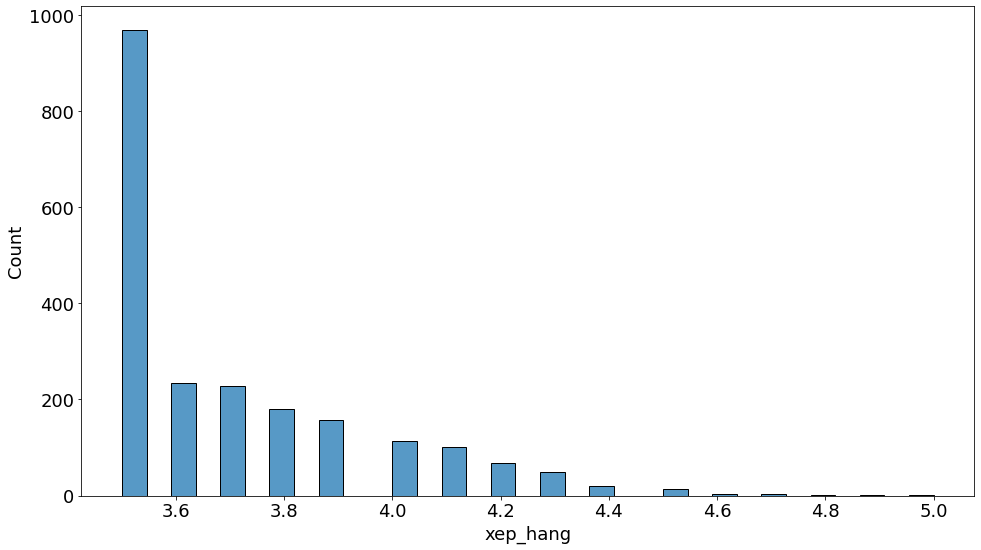

In [156]:
sns.histplot(data = df, x = 'xep_hang');

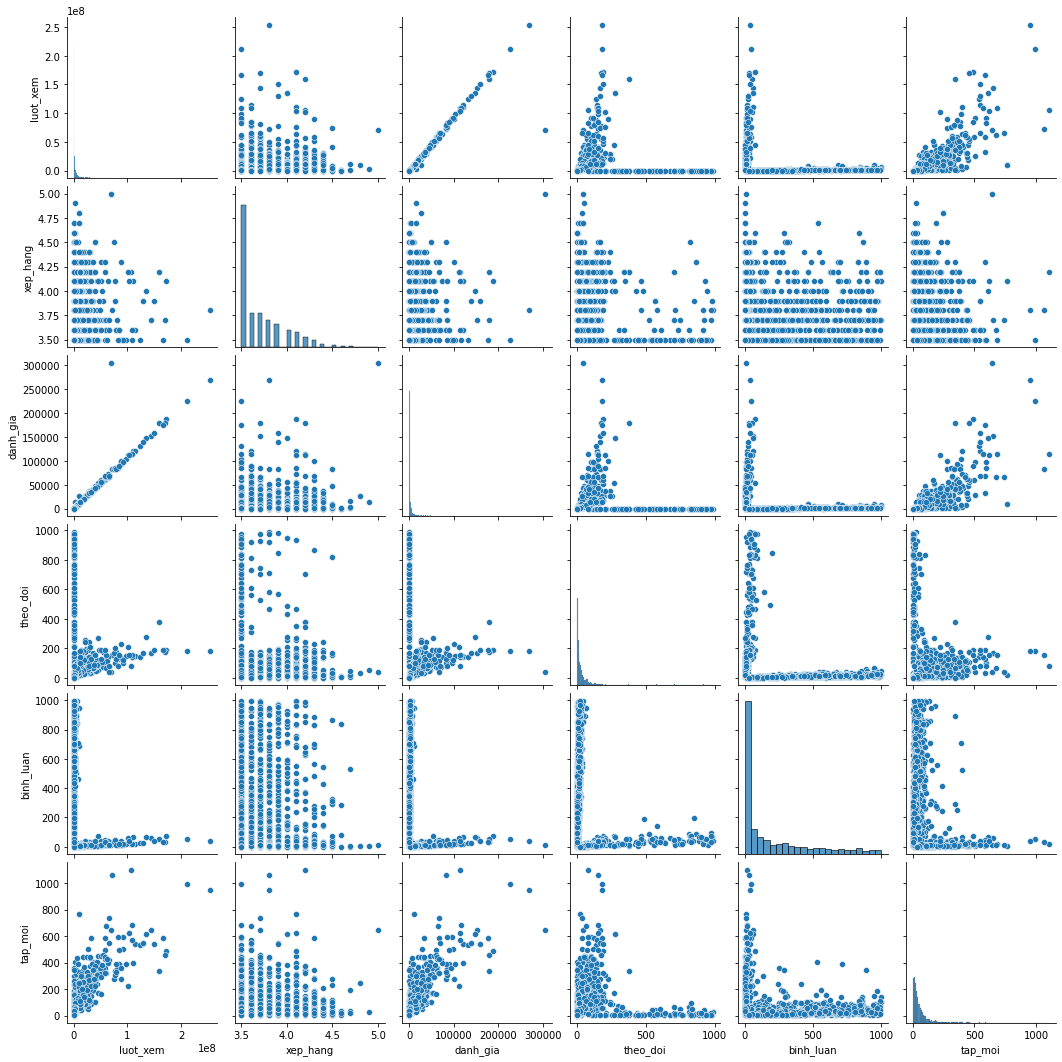

In [97]:
sns.pairplot(data = df);

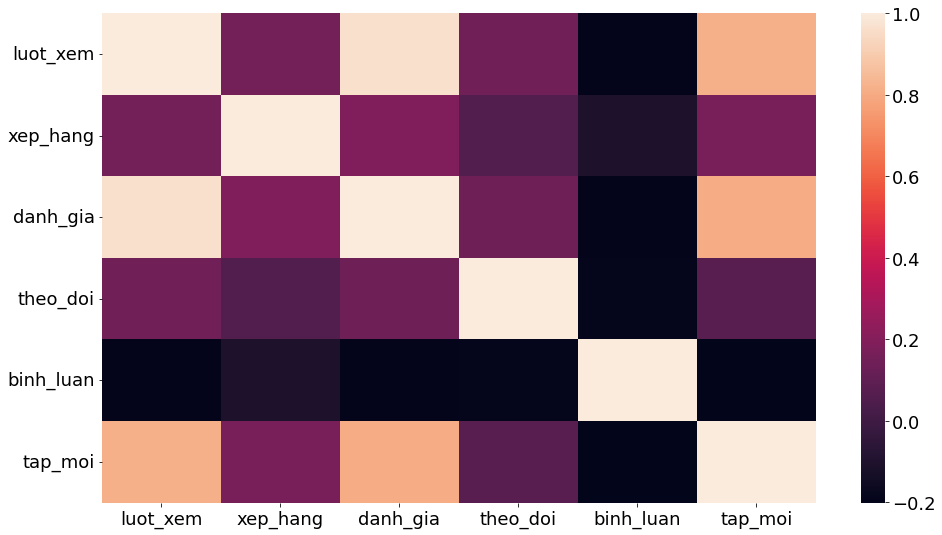

In [157]:
sns.heatmap(df.corr());

# 5. Xây dựng mô hình

In [158]:
from scipy.spatial.distance import cdist

class k_means():
    def __init__(self, K = 2):
        self.K = K
        self.centers_ = {}
        self.labels_ = []

    # chọn k điểm khởi đầu
    def create_center(self, data):
        return data[np.random.choice(data.shape[0], self.K, replace=False)]

    def assign_label(self, data, center):
        # tính toán khoảng cách các điểm đến điểm trung tâm
        D = cdist(data, center)
        # trả về vị trí khoảng cách bé nhất
        return np.argmin(D, axis = 1)

    def update_center(self, data, label):
        center = np.zeros((self.K, data.shape[1]))
        for i in range(self.K):
            # collect all points assigned to the k-th cluster 
            Xi = data[label == i, :]
            # take average
            center[i,:] = np.mean(Xi, axis = 0)
        return center

    def has_converged(self, center, new_center):
        # return True if two sets of centers are the same
        return (set([tuple(a) for a in center]) ==  set([tuple(a) for a in new_center]))

    def poins(self, attr, arr):
        return {k:v for k, v in zip(attr, arr.T)}
        
    def fit(self, df):
        data = df.values
        center = [self.create_center(data)]
        label = []
        while True:
            label.append(self.assign_label(data, center[-1]))
            new_center = self.update_center(data, label[-1])
            if self.has_converged(center[-1], new_center):
                break
            center.append(new_center)

        self.labels_ = pd.DataFrame(label[-1], columns=['class'])
        self.centers_ = pd.DataFrame(self.poins(df.columns, center[-1]))


In [159]:
# chạy thuật toán với 2 lớp
model = k_means()
model.fit(df)

In [160]:
# gộp class vào dataframe
d = df.copy()
d['lop'] = model.labels_['class'].values
d.head()

,luot_xem,xep_hang,danh_gia,theo_doi,binh_luan,tap_moi,lop
0,49635,3.5,130,5.019,87.000,10.0,0
1,76142,3.5,130,3.586,33.000,11.0,0
2,6140283,3.8,7443,91.112,4.169,61.0,0
3,62480,3.5,107,2.795,89.000,22.0,0
4,647241,3.6,953,17.088,949.000,28.0,0


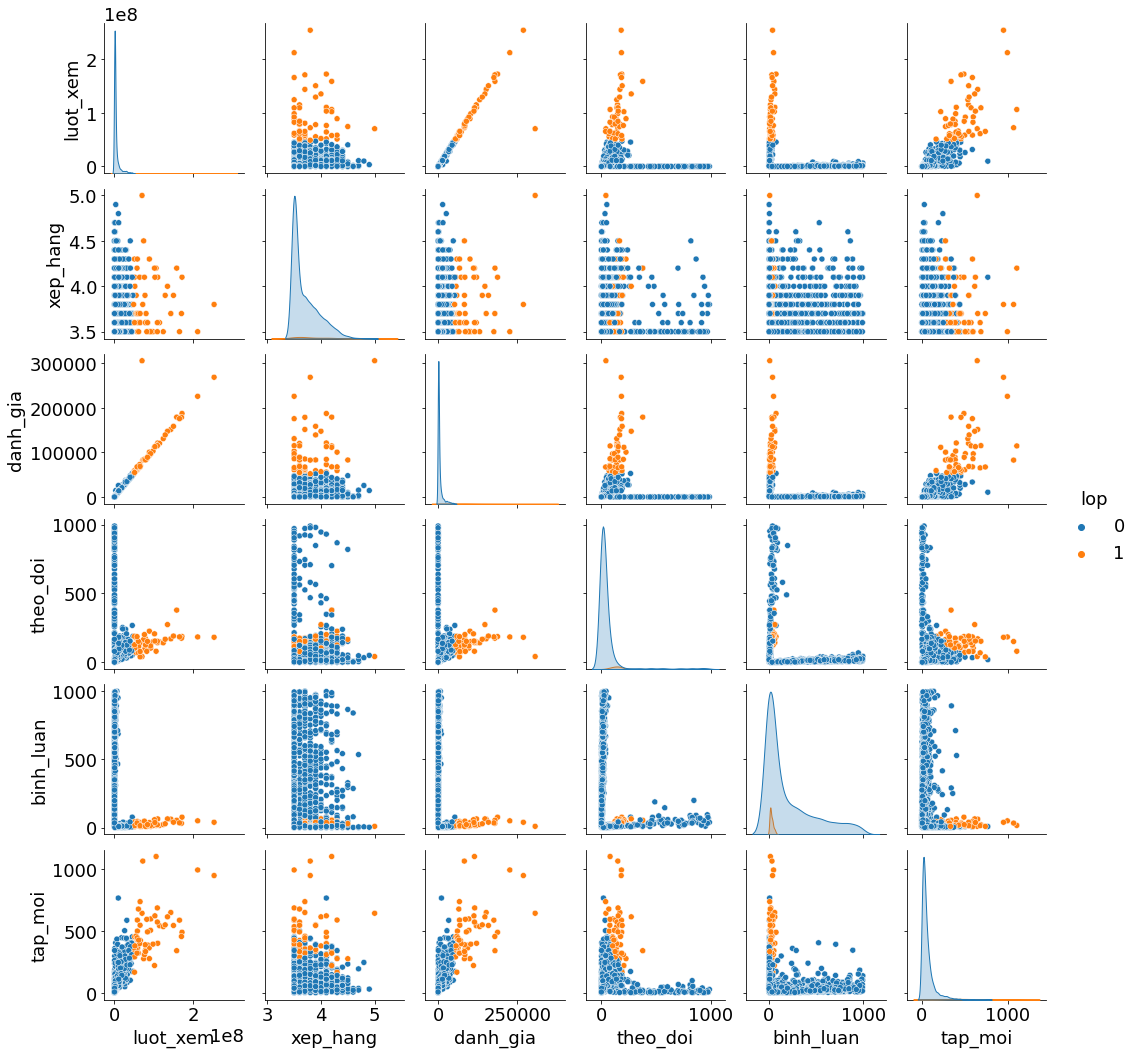

In [161]:
# trực quan cụm
sns.pairplot(data=d, hue='lop');

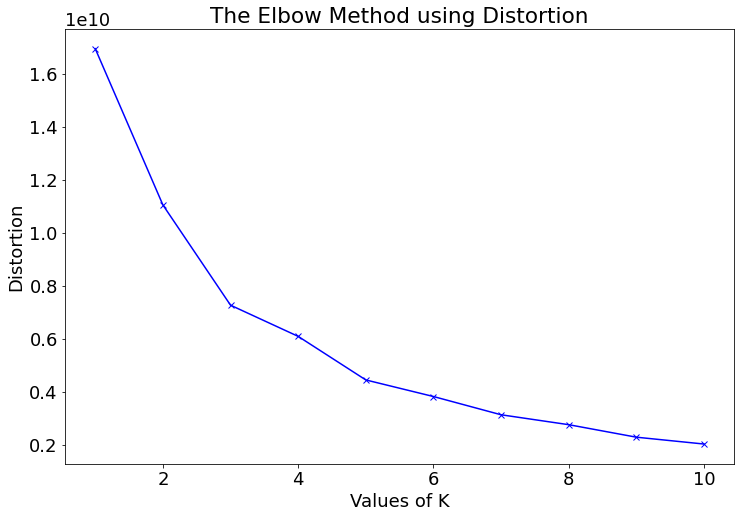

In [162]:
# chọn K tốt nhất
losses = []
K = 11
for i in range(1, K):
  kMeans = k_means(i)
  kMeans.fit(df)
  d2centroids = cdist(df, kMeans.centers_.values, 'euclidean')
  min_distance = np.min(d2centroids, axis=1) # shape (n)
  loss = np.sum(min_distance)
  losses.append(loss)

plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, K), losses, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

theo hình thì $K=3$ sẽ là K tốt nhất

In [163]:
model = k_means(3)
model.fit(df)

In [164]:
d = df.copy()
d['lop'] = model.labels_['class'].values
d.head()

,luot_xem,xep_hang,danh_gia,theo_doi,binh_luan,tap_moi,lop
0,49635,3.5,130,5.019,87.000,10.0,2
1,76142,3.5,130,3.586,33.000,11.0,2
2,6140283,3.8,7443,91.112,4.169,61.0,2
3,62480,3.5,107,2.795,89.000,22.0,2
4,647241,3.6,953,17.088,949.000,28.0,2


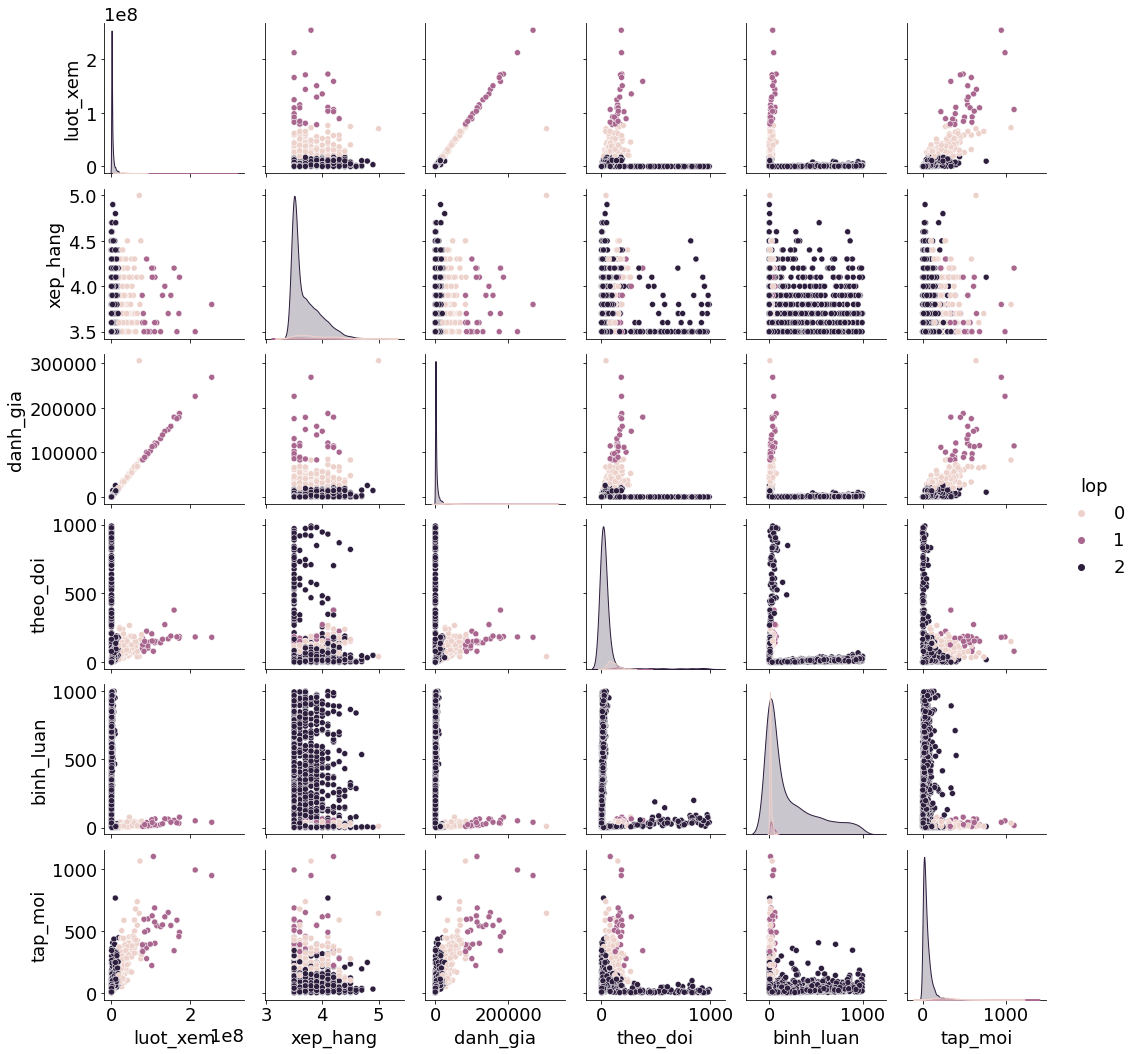

In [165]:
sns.pairplot(data=d, hue='lop');

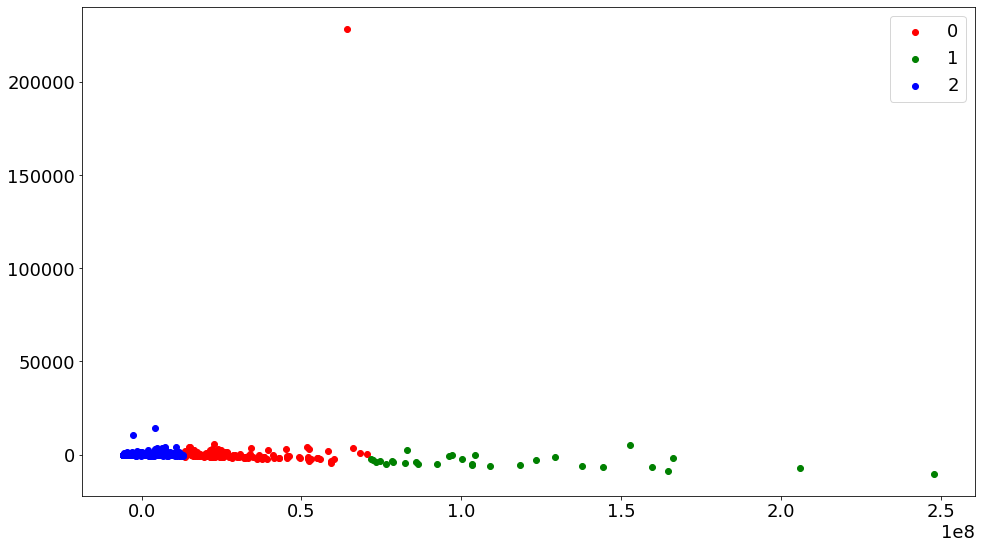

In [166]:
# giảm chiều dữ liệu với PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit(df).transform(df)

d = pd.DataFrame(X, columns=['x', 'y'])
d['z'] = model.labels_.values
for col, cl in zip([0, 1, 2], ['r', 'g', 'b']):
    plt.scatter(d[d.z==col].x, d[d.z==col].y, c=cl, label=f'{col}')
plt.legend()
plt.show()

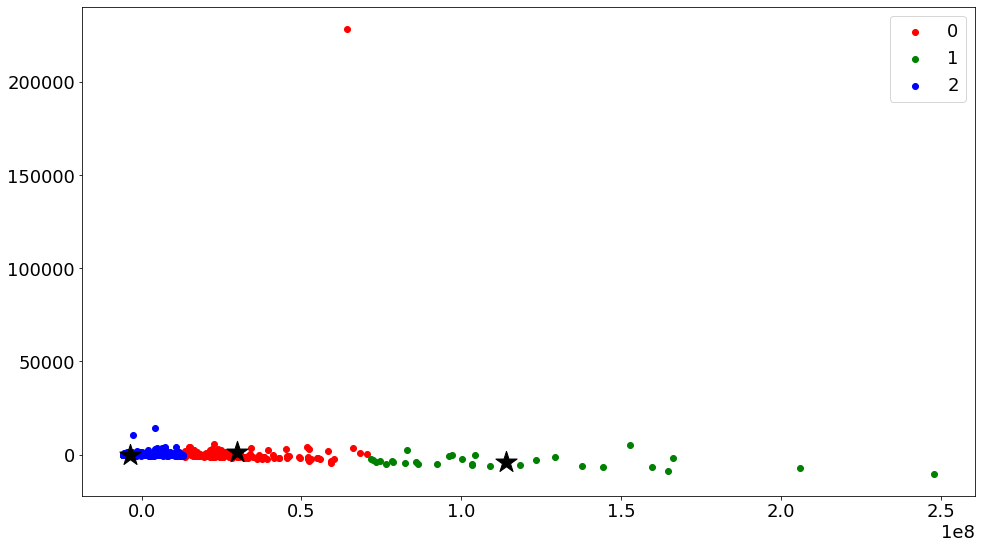

In [167]:
h = pd.DataFrame(X, columns=['x', 'y'])
m = k_means(3)
m.fit(h)

for col, cl in zip([0, 1, 2], ['r', 'g', 'b']):
    plt.scatter(d[d.z==col].x, d[d.z==col].y, c=cl, label=f'{col}')
plt.legend()

plt.scatter(m.centers_['x'], m.centers_['y'], marker='*', c = 'black', s = 500)
plt.show()

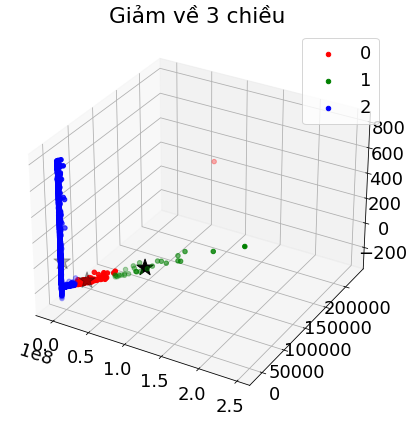

In [168]:
# giảm về 3 chiều
from mpl_toolkits import mplot3d

pca = PCA(n_components=3)
X = pca.fit(df).transform(df)
h = pd.DataFrame(X, columns=['x', 'y', 'z'])
m = k_means(3)
m.fit(h)

d = pd.DataFrame(X, columns=['x', 'y', 'z'])
d['c'] = model.labels_.values

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

for col, cl in zip([0, 1, 2], ['r', 'g', 'b']):
    ax.scatter3D(d[d.c==col].x, d[d.c==col].y, d[d.c==col].z, c=cl, label=f'{col}')
    # plt.scatter(d[d.z==col].x, d[d.z==col].y, c=cl, label=f'{col}')
plt.legend()
# ax.scatter3D(d.x, d.y, d.z, c = d.c)
ax.scatter3D(m.centers_.x, m.centers_.y, m.centers_.z, color = "black", marker='*', s=300)
plt.title("Giảm về 3 chiều")
plt.show()



In [138]:
# export ra file csv để trực quan 3d
d.to_csv('plot3d.csv')
m.centers_.to_csv('centers3d.csv')

# 6. Mô hình sklearn

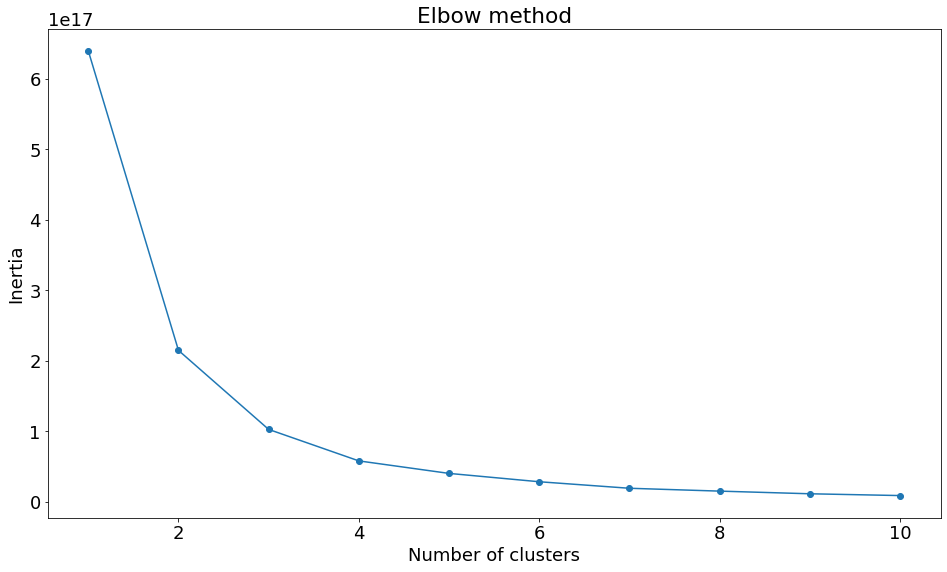

In [169]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [170]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
kmeans.cluster_centers_

array([[9.27393809e+07, 3.82000000e+00, 1.03769818e+05, 1.42711782e+02,
        2.69624727e+01, 4.92727273e+02],
       [3.67958168e+06, 3.69928161e+00, 4.28067912e+03, 5.17739602e+01,
        1.98009173e+02, 5.85498084e+01]])

In [171]:
kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1])

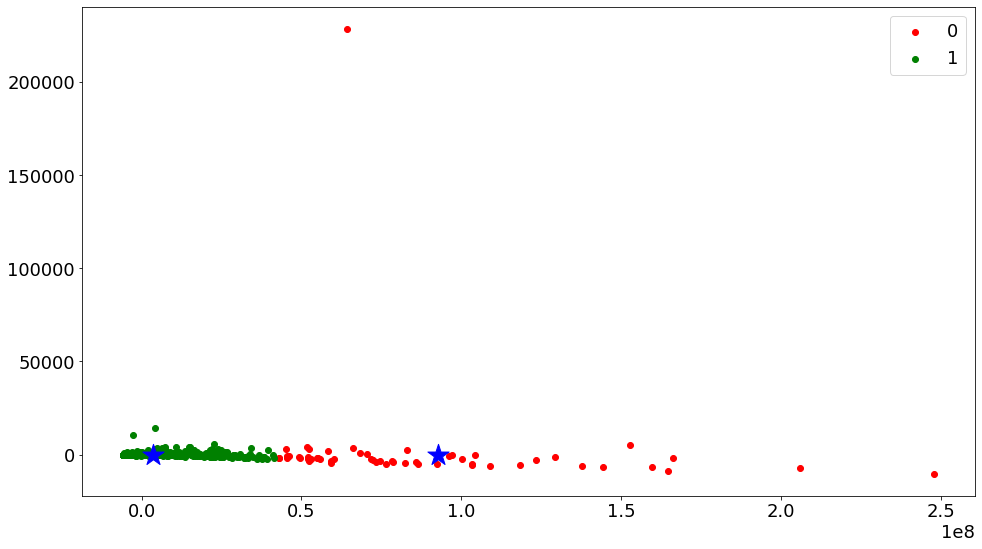

In [172]:
# giảm chiều dữ liệu với PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit(df).transform(df)
ct = kmeans.cluster_centers_

d = pd.DataFrame(X, columns=['x', 'y'])
d['z'] = kmeans.labels_
for col, cl in zip([0, 1], ['r', 'g']):
    plt.scatter(d[d.z==col].x, d[d.z==col].y, c=cl, label=f'{col}')

plt.scatter(ct[:, 0], ct[:, 1], marker='*', c = 'b', s = 500)
plt.legend()
plt.show()